In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set figure size, line width, and tick label size
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
#mengecek spasi kosong
df.eq('').sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.shape

(1470, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Pengamatan:

- Data terdiri dari 1470 baris <br>
- Tidak ada data yang NULL/Missing Value <br>
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)<br>

In [9]:
#Mendefinisikan kolom yang di analisis
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [10]:
#df.select_dtypes('int').columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [12]:
df.describe().loc[['mean', '50%']].T

,mean,50%
Age,36.923810,36.0
DailyRate,802.485714,802.0
DistanceFromHome,9.192517,7.0
Education,2.912925,3.0
EmployeeCount,1.000000,1.0
EmployeeNumber,1024.865306,1020.5
EnvironmentSatisfaction,2.721769,3.0
HourlyRate,65.891156,66.0
JobInvolvement,2.729932,3.0
JobLevel,2.063946,2.0


In [13]:
df[cats].head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [14]:
df[cats].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Observasi :

Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome` <br>
Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `Over18`

### Cek Duplikat

In [15]:
df.duplicated().any()

False

### Cek data NULL

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
#melihat unique value di setiap kolom bertipe object
for col in cats:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Attrition
Unique values: ['Yes', 'No']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

Column: Gender
Unique values: ['Female', 'Male']

Column: JobRole
Unique values: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']

Column: MaritalStatus
Unique values: ['Single', 'Married', 'Divorced']

Column: Over18
Unique values: ['Y']

Column: OverTime
Unique values: ['Yes', 'No']



Observasi :

Tidak terdapat data `duplikat` <br>
Setiap kolom tidak memiliki niali `NULL`

# VIsualization

In [18]:
df_a = df.groupby('Attrition').size().reset_index(name='Jumlah')
df_a['Jumlah'] = df_a['Jumlah'].apply(lambda x: f'{(x/len(df)) * 100:.2f}%')
df_a


,Attrition,Jumlah
0,No,83.88%
1,Yes,16.12%


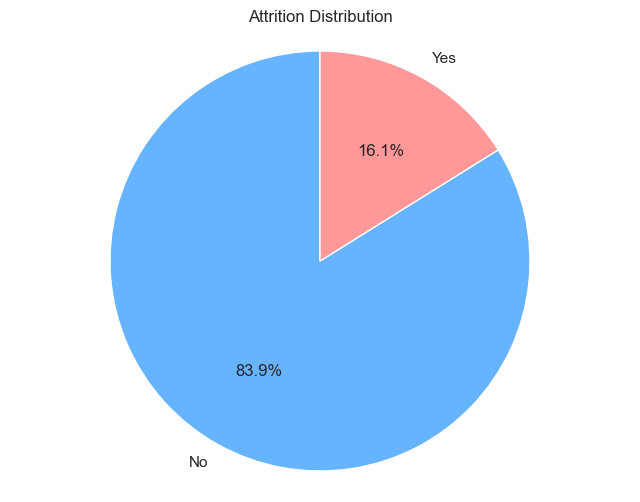

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a pie chart for attrition
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_attrition = df['Attrition'].value_counts()
labels = df_attrition.index
plt.pie(df_attrition, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Attrition Distribution")
plt.axis('equal')
plt.show()


### Gender

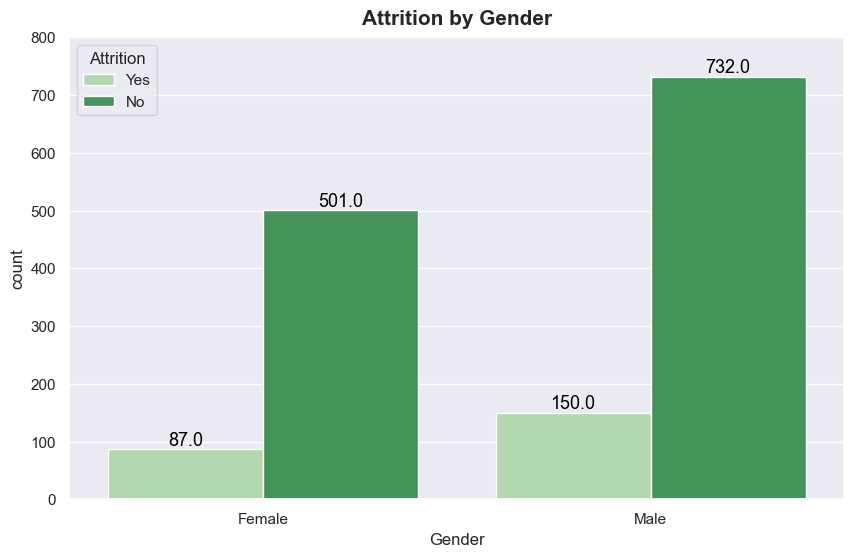

In [20]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Gender', hue='Attrition',   data=df, palette='Greens')
plt.ylim(0,800)
plt.title('Attrition by Gender', fontsize=15, weight='bold', y=1.01)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='black')

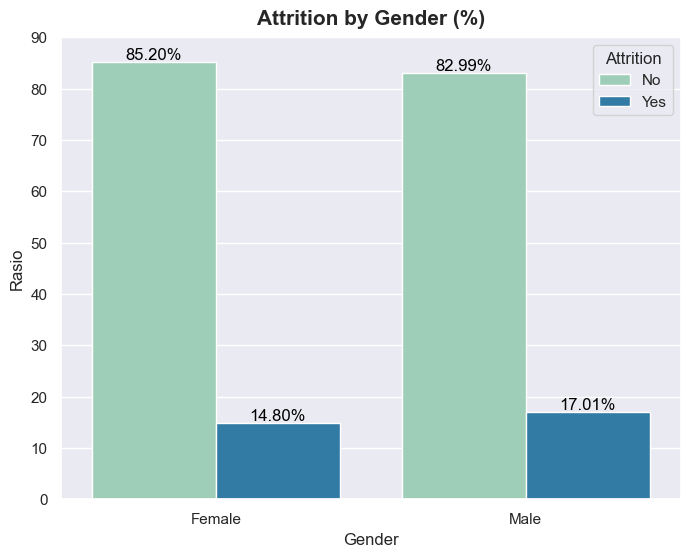

In [21]:
df_group = df.groupby('Gender').size().reset_index(name='Total')
df_group1=df.groupby(['Gender','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Gender', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Gender', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by Gender (%)', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,90)


#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       

plt.show()


Secara jumlah, jenis kelamin laki-laki lebih banyak yang memutuskan keluar, diperjelas juga dengan proporsi pada masing-masing jenis kelamin, meski begitu selisihnya tidak terlalu jauh hanya sekitar >2% untuk yang memutuskan keluar

### Department

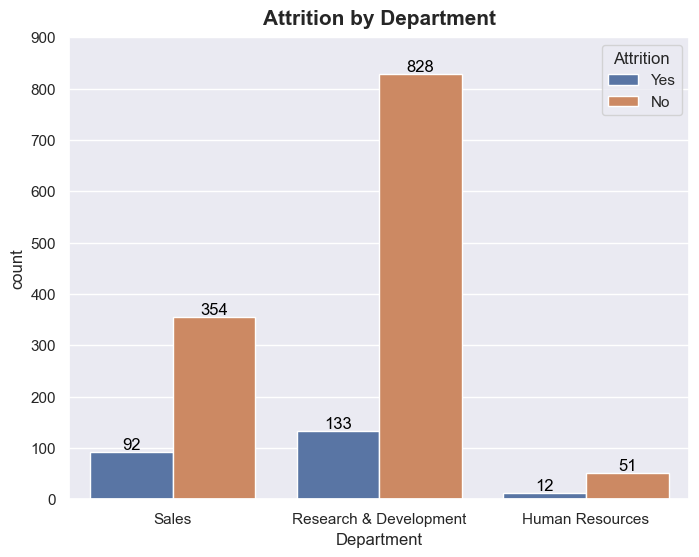

In [22]:
#melihat jumlah yang keluar berdasarkan department
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Department', hue='Attrition')
plt.ylim(0,900)
plt.title('Attrition by Department', fontsize=15, weight='bold', y=1.01)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.show()

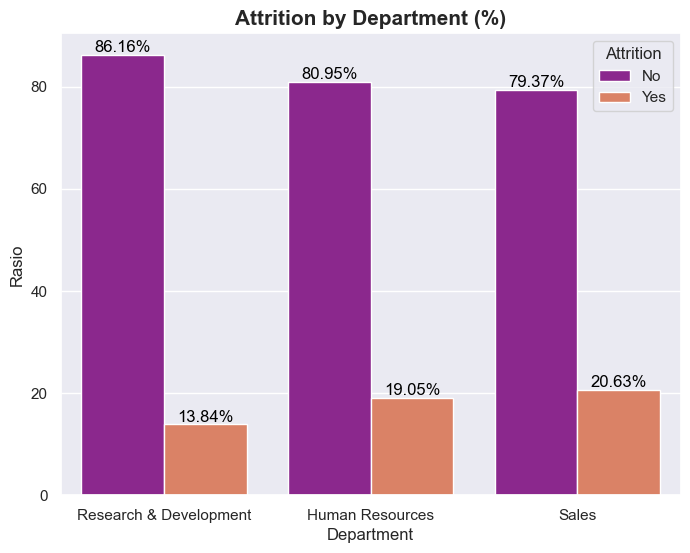

In [23]:
#mencari Rasio setiap departemen yang keluar dan bertahan

df_group = df.groupby('Department').size().reset_index(name='Total')
df_group1=df.groupby(['Department','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Department', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)
df_gab = df_gab.sort_values('Rasio', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Department', y='Rasio', hue='Attrition', palette='plasma')
plt.title('Attrition by Department (%)', weight='bold', fontsize=15)
#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       

plt.show()


Jika diperhatikan, dep R&D lebih banyak yang keluar, namun jika dibandingkan ternyata secara proporsi dep Sales lebih banyak yang keluar

### JobRole

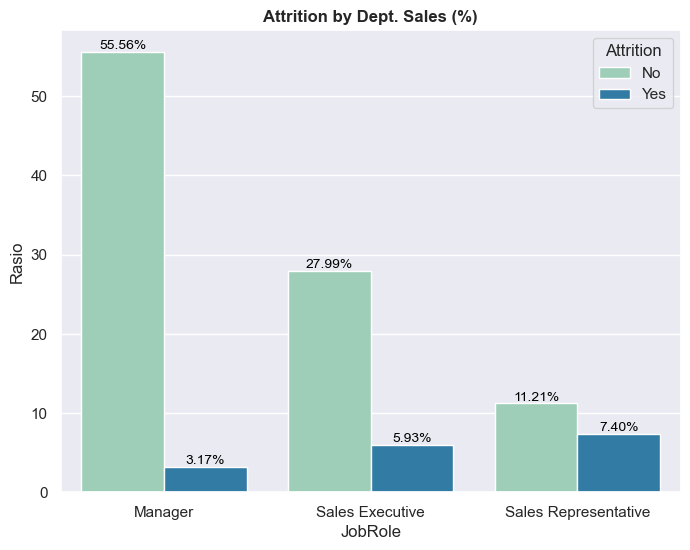

In [24]:
#seleksi data sales saja
dfh = df[df['Department']=='Sales']

#group data
df_group = dfh.groupby('JobRole').size().reset_index(name='Total')
df_group1=dfh.groupby(['JobRole','Attrition']).size().reset_index(name='Jumlah')
df_gab1 = df_group1.merge(df_group, on='JobRole', how='left')
df_gab1['Rasio']= round((df_gab1['Jumlah']/df_gab['Total'])*100, 2)

#plot data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab1, x='JobRole', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by Dept. Sales (%)', weight='bold')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

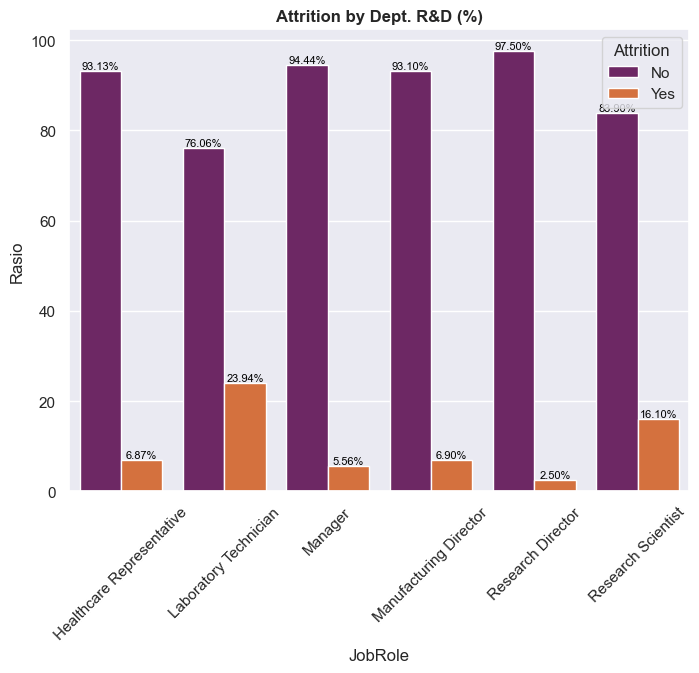

In [25]:
#seleksi data 
dfg = df[df['Department']=='Research & Development']

#group data
df_group = dfg.groupby('JobRole').size().reset_index(name='Total')
df_group1=dfg.groupby(['JobRole','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='JobRole', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

#plot data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='JobRole', y='Rasio', hue='Attrition', palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Attrition by Dept. R&D (%)', weight='bold')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')
       
plt.show()

Setelah di bedah lagi, ternyata dep Sales yang paling banyak keluar ada pada role job sebagai Sales Representative, sedangkan untuk R&D ada pada Laboratory Technician

### Distance From Home & Years At Company

In [26]:
dfc=df.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
dfc['DistanceFromHome'] = dfc['DistanceFromHome'].apply(lambda x: round(x,2))
dfc


,Attrition,DistanceFromHome
0,No,8.92
1,Yes,10.63


In [27]:
dfb=df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()
dfb['YearsAtCompany'] = dfb['YearsAtCompany'].apply(lambda x: round(x,2))
dfb

,Attrition,YearsAtCompany
0,No,7.37
1,Yes,5.13


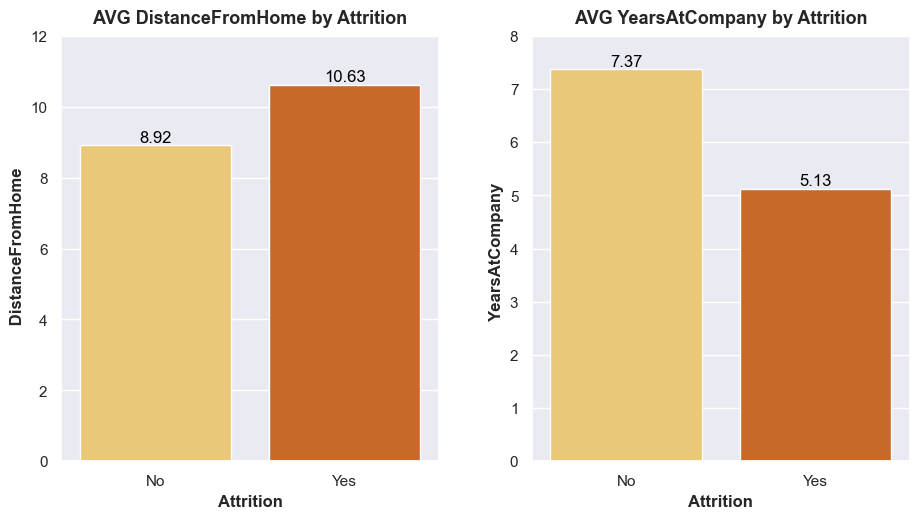

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Grafik average tenure by status
sns.barplot(data=dfc, x='Attrition', y='DistanceFromHome', ax=ax[0], palette='YlOrBr')
ax[0].set_xlabel('Attrition', fontsize=12, weight='bold')
ax[0].set_ylabel(' DistanceFromHome', fontsize=12, weight='bold')
ax[0].set_title('AVG DistanceFromHome by Attrition', fontsize=13, weight='bold', y=1.01)
ax[0].set_ylim(0, 12)

for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Grafik average monthly charges by status
sns.barplot(data=dfb, x='Attrition', y='YearsAtCompany', ax=ax[1], palette='YlOrBr')
ax[1].set_xlabel('Attrition', fontsize=12, weight='bold')
ax[1].set_ylabel('YearsAtCompany ', fontsize=12, weight='bold')
ax[1].set_title('AVG YearsAtCompany by Attrition', fontsize=13, weight='bold', y=1.01)
ax[1].set_ylim(0, 8)

for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


fig.tight_layout(pad=3.0)
plt.show()


- Rata-rata jarak dari rumah menuju ke kantor ternyata berpengaruh terhdapa keputusan untuk keluar dari perushaan
- Lamanya bekerja karywana yang keluar rata-rata sekitar > 5tahun

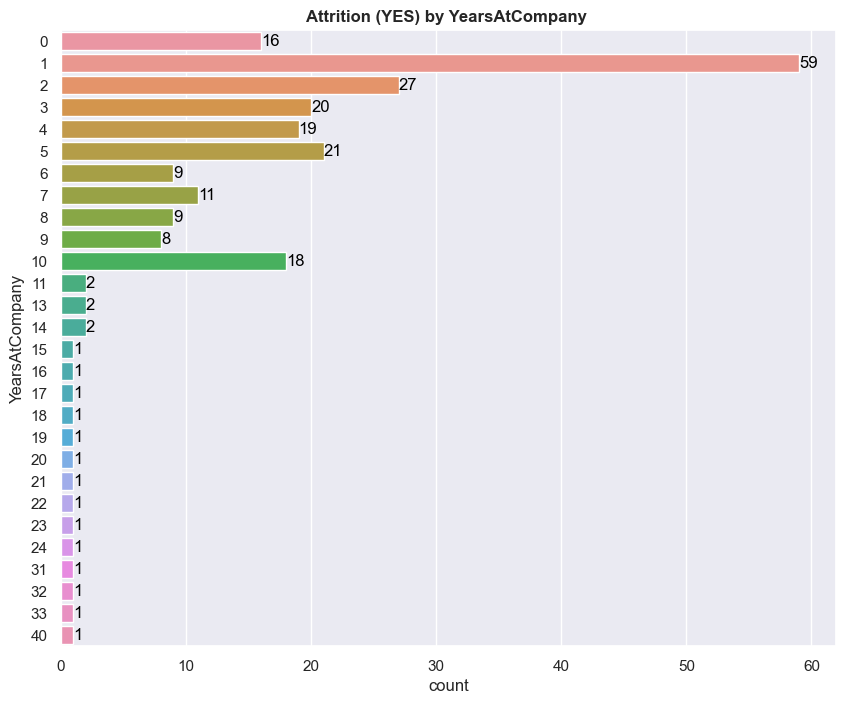

In [89]:
#melihat pada tahun berapa karywana banyak yang kelaur
asd = df[df['Attrition'] == 'Yes']

plt.figure(figsize=(10,8))
ax = sns.countplot(data=asd, y='YearsAtCompany')
plt.title('Attrition (YES) by YearsAtCompany ', weight='bold')
#plt.legend(title='Attrition - Yes')

for p in ax.patches:
    width = p.get_width()  # Menggunakan width daripada height
    x, y = p.get_xy()  # Mengambil koordinat x dan y
    ax.text(x + width, y + p.get_height() / 2, f'{int(width)}',  # Menempatkan label di ujung kanan setiap bar
            ha='left', va='center', fontsize=12, color='black')
    
plt.show()

Pada tahun 0-5 tahun, karyawan paling banyak yang keluar, dan pada tahun pertama ternyata sudah banyak karywana baru yang memutuskan untuk langsung resign

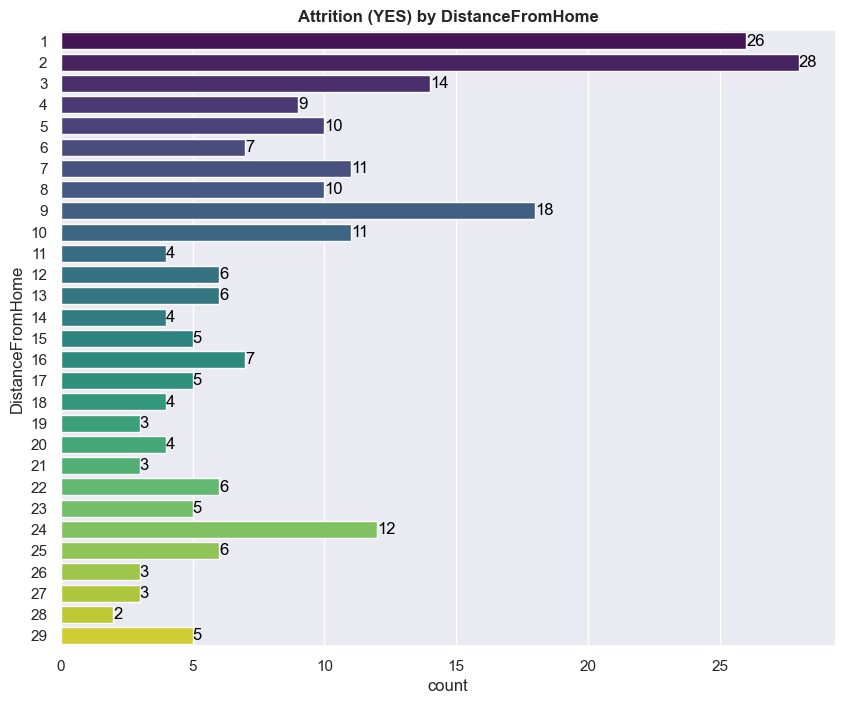

In [88]:
#melihat jarak setiap karywaan yang memututskan keluar
asd = df[df['Attrition'] == 'Yes']

plt.figure(figsize=(10,8))
ax=sns.countplot(data=asd, y='DistanceFromHome', palette='viridis')
plt.title('Attrition (YES) by DistanceFromHome', weight='bold')

for p in ax.patches:
    width = p.get_width()  # Menggunakan width daripada height
    x, y = p.get_xy()  # Mengambil koordinat x dan y
    ax.text(x + width, y + p.get_height() / 2, f'{int(width)}',  # Menempatkan label di ujung kanan setiap bar
            ha='left', va='center', fontsize=12, color='black')

plt.show()

Jarak rumah setiap karyawan yang memutuskan keluar lumayan bervariasi, jarak 1-2 KM paling banyak yang keluar.

### JobSatisfaction

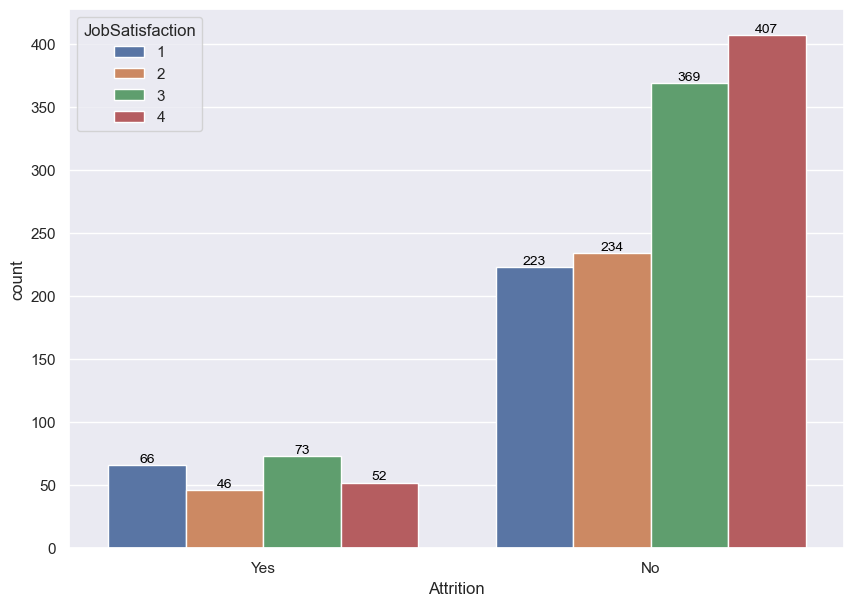

In [29]:
ax = sns.countplot(x='Attrition', hue='JobSatisfaction', data=df, palette='deep')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

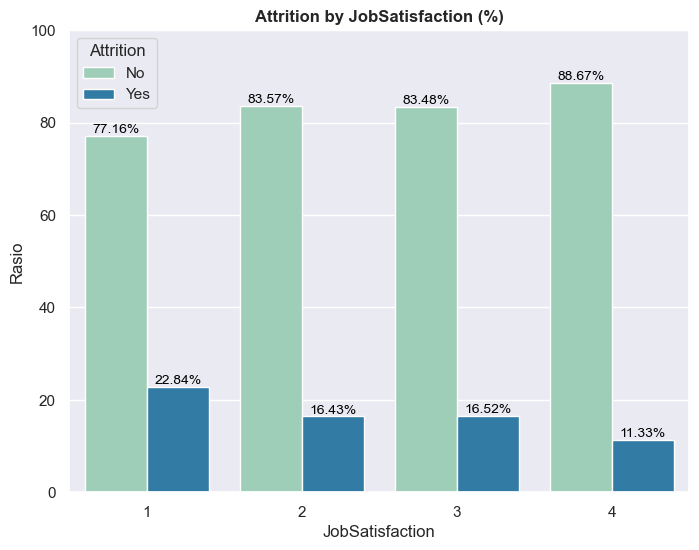

In [30]:
df_group = df.groupby('JobSatisfaction').size().reset_index(name='Total')
df_group1=df.groupby(['JobSatisfaction','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='JobSatisfaction', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='JobSatisfaction', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by JobSatisfaction (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

Kenyamaan karyawan berpengaruh disini, bisa dilihat bahwa semakin kecil rating yang dipilih maka makin besar kecendrungan karyawan untuk memutuskan keluar dari perusahaan

### EnvironmentSatisfaction

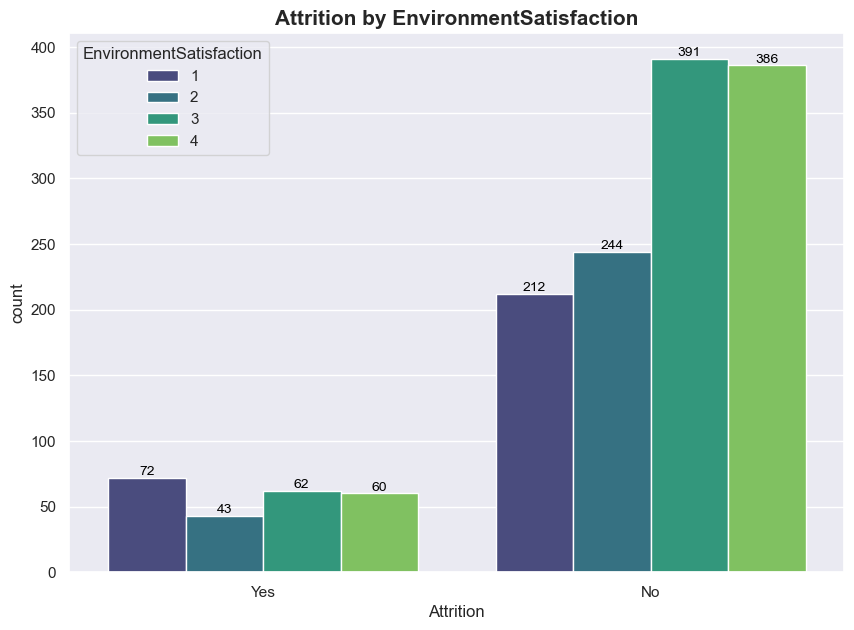

In [31]:
ax=sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=df, palette='viridis')
plt.title('Attrition by EnvironmentSatisfaction', fontsize=15, weight='bold')
#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

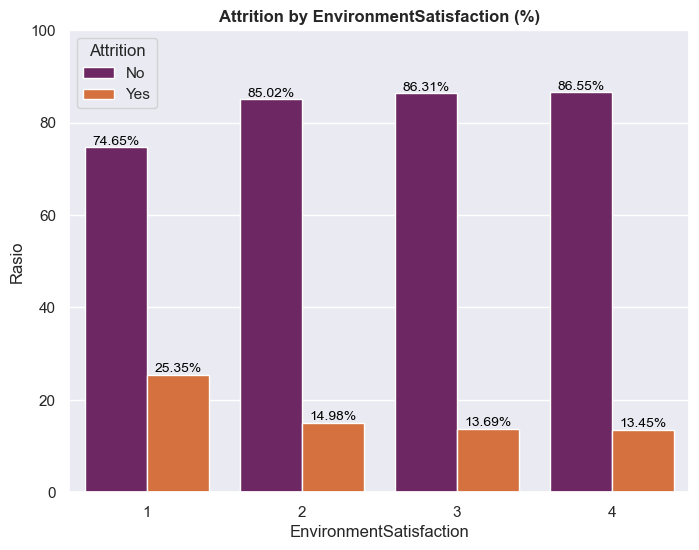

In [32]:
df_group = df.groupby('EnvironmentSatisfaction').size().reset_index(name='Total')
df_group2=df.groupby(['EnvironmentSatisfaction','Attrition']).size().reset_index(name='Jumlah')
df_gab2 = df_group2.merge(df_group, on='EnvironmentSatisfaction', how='left')
df_gab2['Rasio']= round((df_gab2['Jumlah']/df_gab2['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab2, x='EnvironmentSatisfaction', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by EnvironmentSatisfaction (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

Karyawan yang memilih rating 1 untuk enviromentsatisfaction cenderung lebih banyak untuk memutuskan keluar dari perusahaan

### PerformanceRating

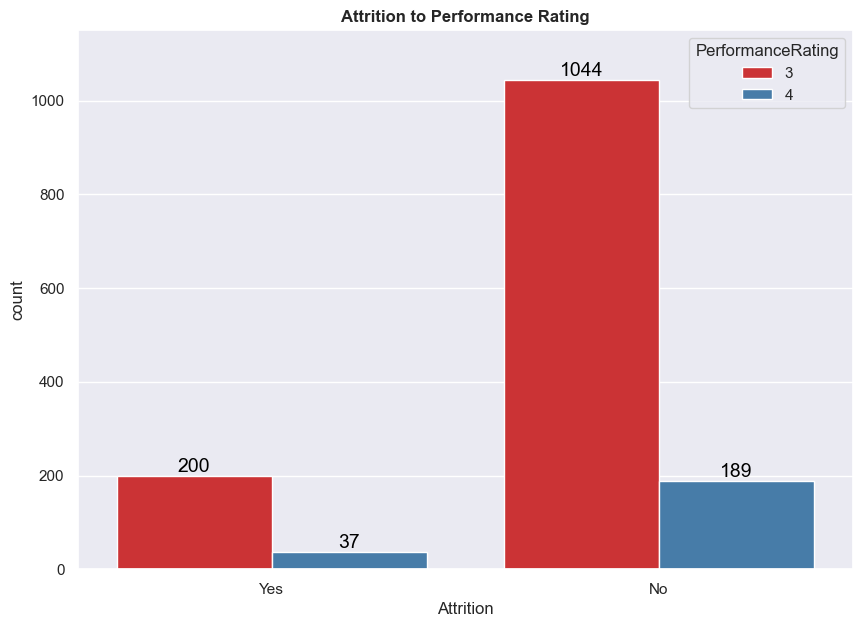

In [33]:
ax = sns.countplot(x='Attrition', hue='PerformanceRating', data=df, palette='Set1')
plt.title('Attrition to Performance Rating', weight='bold')
plt.ylim(0,1150)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()


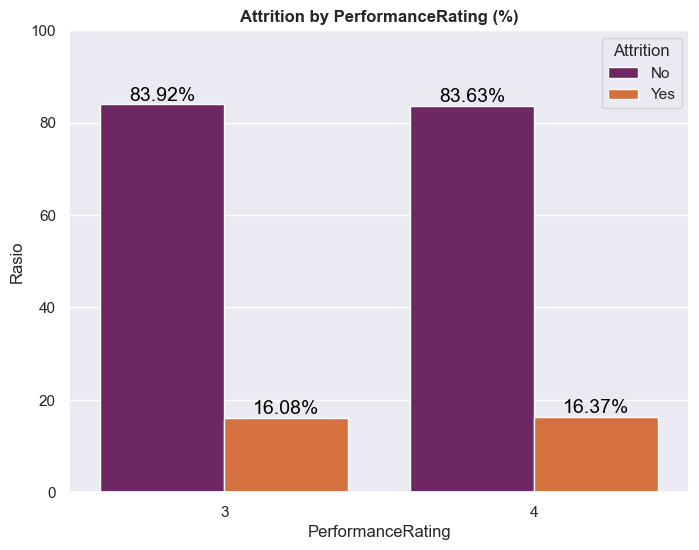

In [34]:
df_group = df.groupby('PerformanceRating').size().reset_index(name='Total')
df_group3=df.groupby(['PerformanceRating','Attrition']).size().reset_index(name='Jumlah')
df_gab3 = df_group3.merge(df_group, on='PerformanceRating', how='left')
df_gab3['Rasio']= round((df_gab3['Jumlah']/df_gab3['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab3, x='PerformanceRating', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by PerformanceRating (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

Untuk performa rating 3 dan 4 cenderung menghasilkan nilai yang sama, artinya bahwa rating tidak terlalu berpengaruh dan akan di drop pada proses selanjutnya

### OverTime

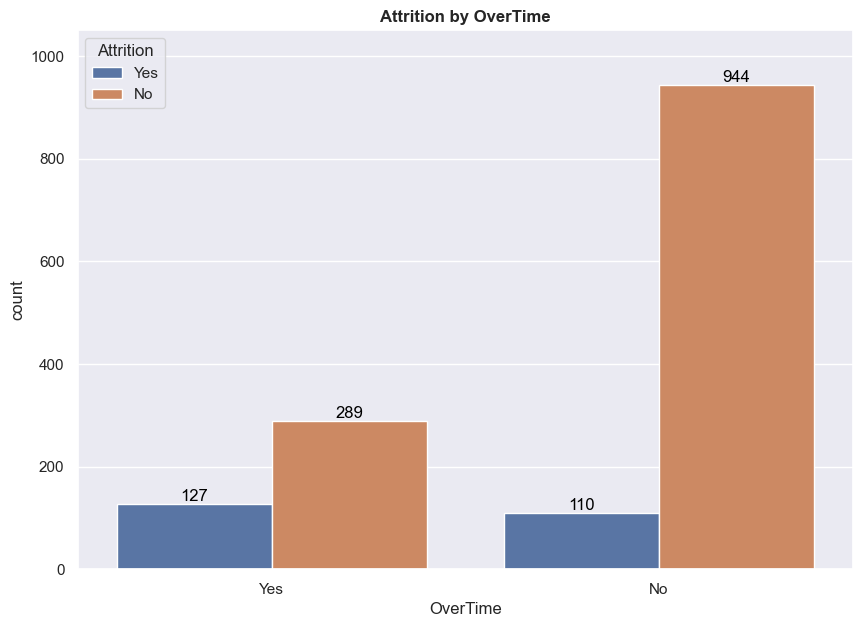

In [35]:
ax= sns.countplot(x='OverTime' ,hue='Attrition', data=df)
plt.title('Attrition by OverTime', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

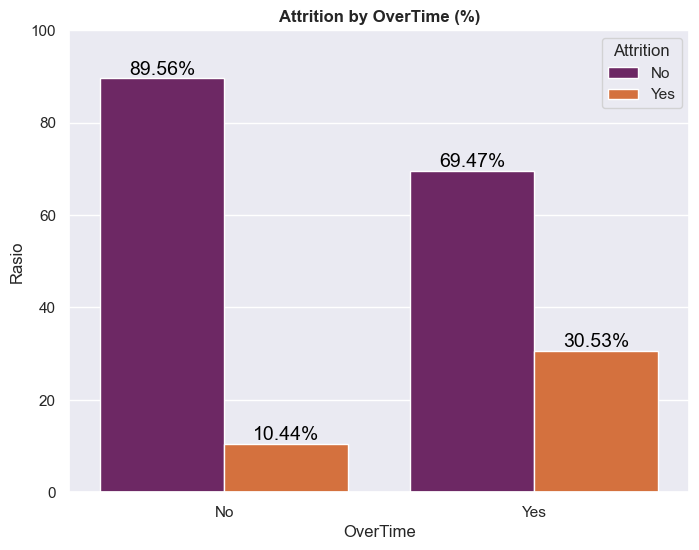

In [36]:
df_group = df.groupby('OverTime').size().reset_index(name='Total')
df_group4=df.groupby(['OverTime','Attrition']).size().reset_index(name='Jumlah')
df_gab4 = df_group4.merge(df_group, on='OverTime', how='left')
df_gab4['Rasio']= round((df_gab4['Jumlah']/df_gab4['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab4, x='OverTime', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by OverTime (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

Ternyata karaywan yang mendapatkan jam tambahan kerja berpengaruh terhadap keputusan untuk memilih keluar dari perusahaan

### JobInvolvement

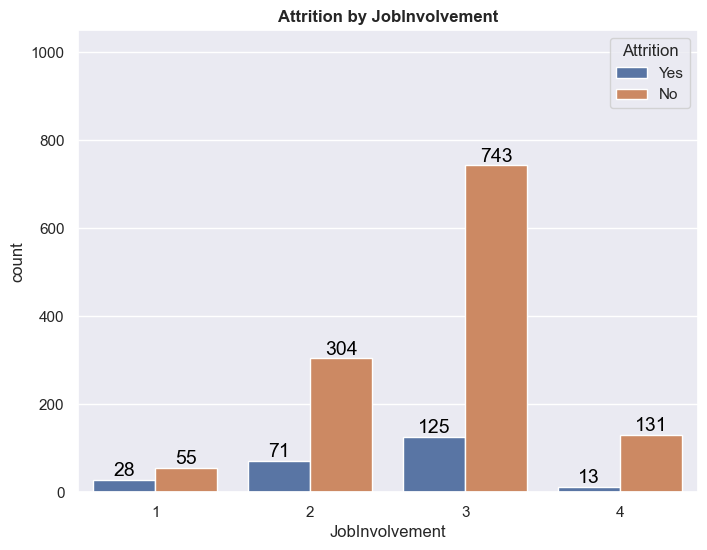

In [106]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='JobInvolvement' ,hue='Attrition', data=df)
plt.title('Attrition by JobInvolvement', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
plt.show()

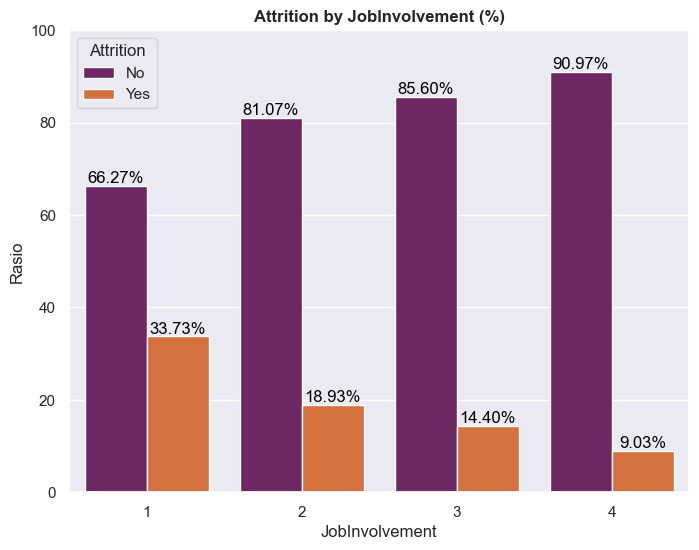

In [103]:
df_group = df.groupby('JobInvolvement').size().reset_index(name='Total')
df_group5=df.groupby(['JobInvolvement','Attrition']).size().reset_index(name='Jumlah')
df_gab5 = df_group5.merge(df_group, on='JobInvolvement', how='left')
df_gab5['Rasio']= round((df_gab5['Jumlah']/df_gab5['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab5, x='JobInvolvement', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by JobInvolvement (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       
plt.show()

Dari jumlah karyawan yang terlibat dalam suatu pekerjaan, yang tingkat keterlibatannya paling rendah (1) cenderung lebih banyak yang memutuskan keluar sekitar 33.27%

### JobLevel

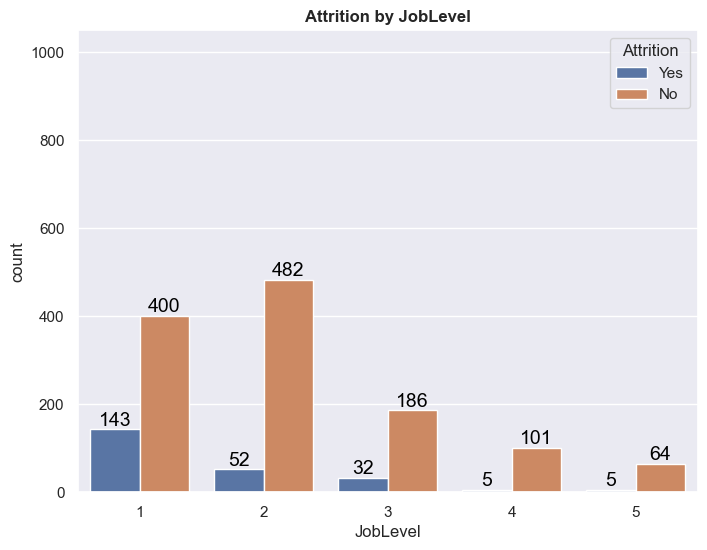

In [108]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='JobLevel' ,hue='Attrition', data=df)
plt.title('Attrition by JobLevel', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
plt.show()

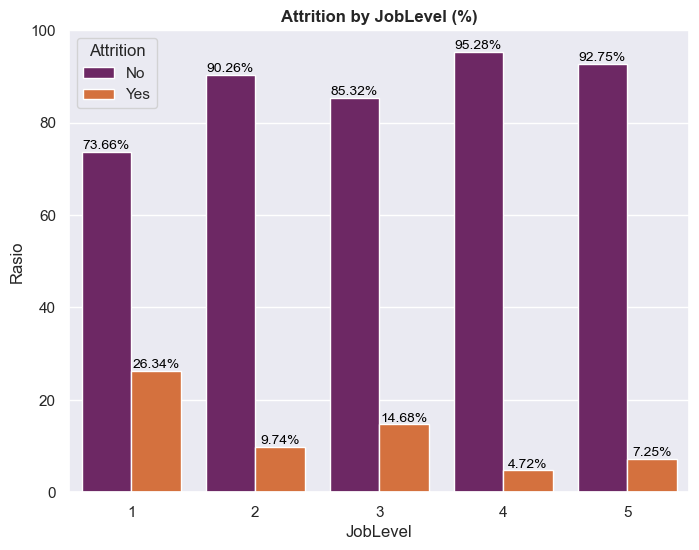

In [112]:
df_group = df.groupby('JobLevel').size().reset_index(name='Total')
df_group6=df.groupby(['JobLevel','Attrition']).size().reset_index(name='Jumlah')
df_gab6 = df_group6.merge(df_group, on='JobLevel', how='left')
df_gab6['Rasio']= round((df_gab6['Jumlah']/df_gab6['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab6, x='JobLevel', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by JobLevel (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

Karywana dengan level rendah cendrung lebih banyak yang keluar, mungkin hal ini bisa terjadi karena adanya tawaran yang lebih menaraik dari perusahaan lain disamping mereka juga ingin meningkatkan jenjang karir

### MonthlyIncome

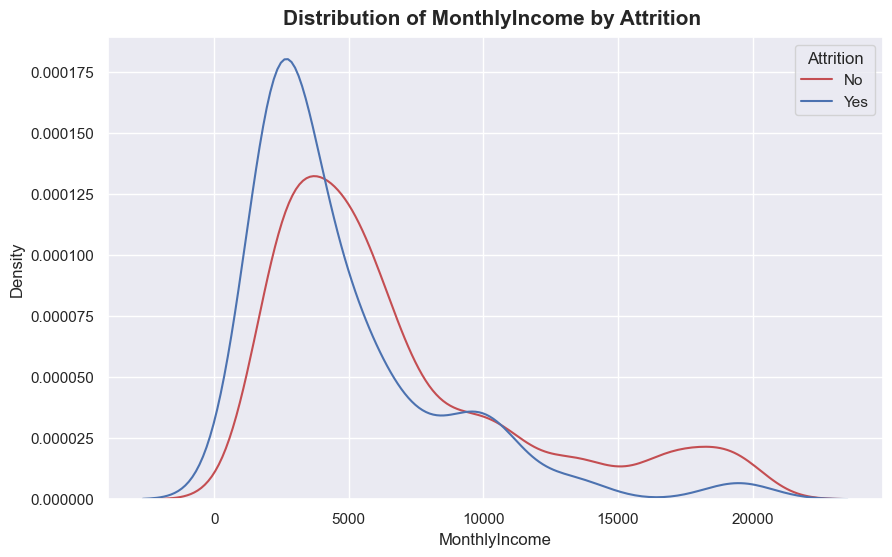

In [96]:
a= df[df['Attrition']=='No']['MonthlyIncome'].values 
b= df[df['Attrition']=='Yes']['MonthlyIncome'].values

plt.figure(figsize=(10,6))
plt.title('Distribution of MonthlyIncome by Attrition ', fontsize=15, weight='bold', y=1.01)
sns.kdeplot(x=a, label='No', color='r')
sns.kdeplot(x=b, label='Yes', color='b')
plt.xlabel('MonthlyIncome')
plt.legend(title='Attrition')
plt.show()

Karyawan dengan gaji di bawah $7000 lebih banyak yang memutuskan untuk keluar

# Univariat

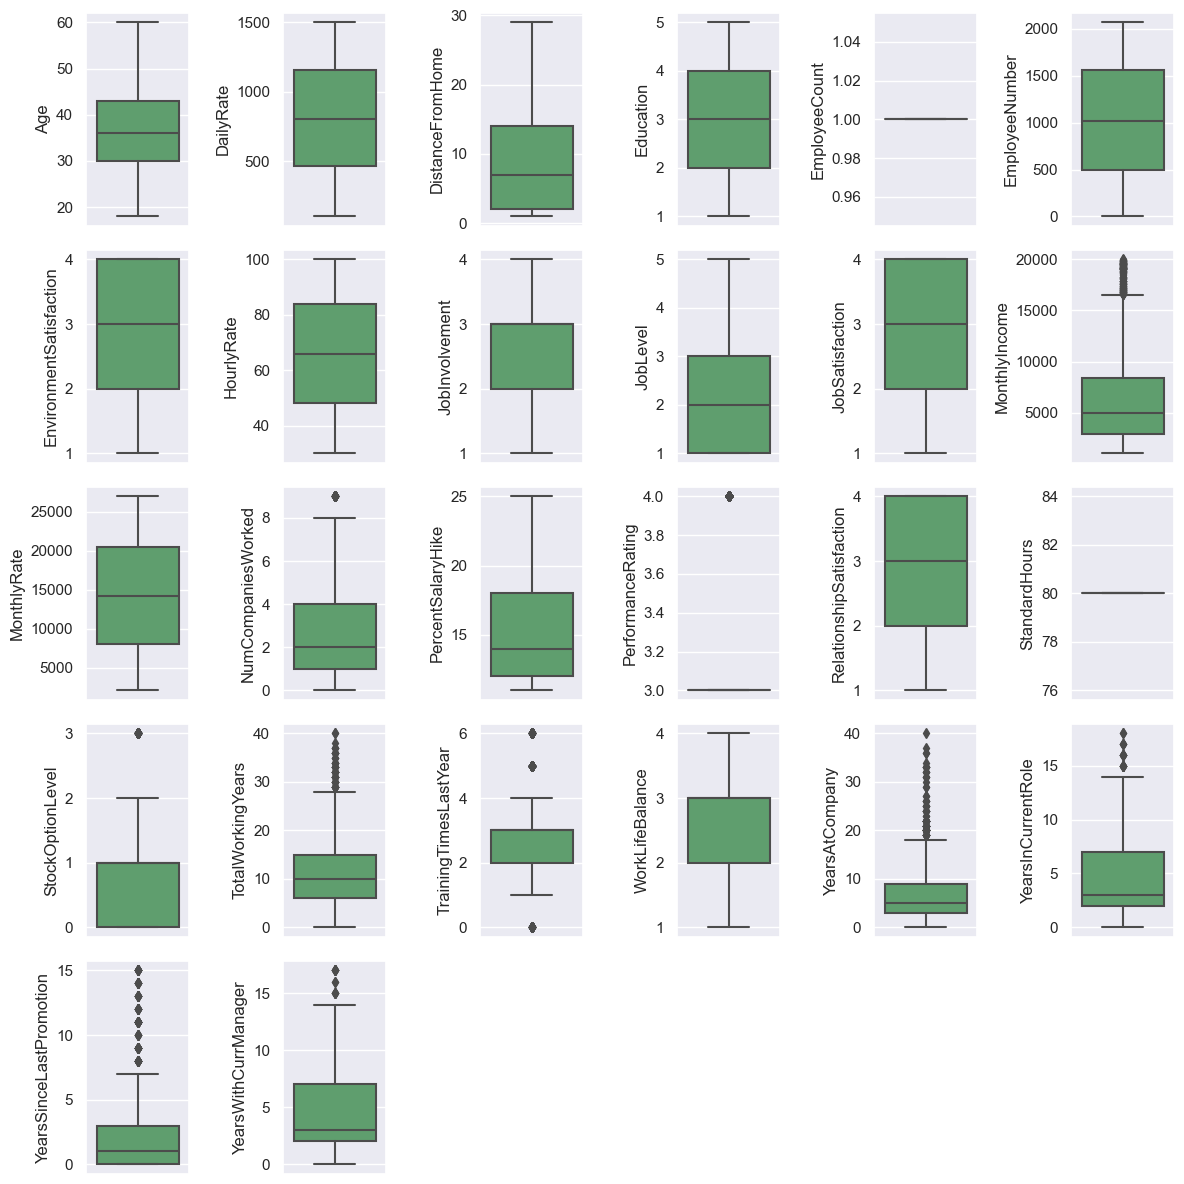

In [38]:
#incividual Boxplot(numeric)
import math
features = nums
plt.figure(figsize=(12,12))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(nums)/6), 6, i+1)
    sns.boxplot(y=df[features[i]], color='g', orient='v')
    plt.tight_layout()
    
plt.show() 

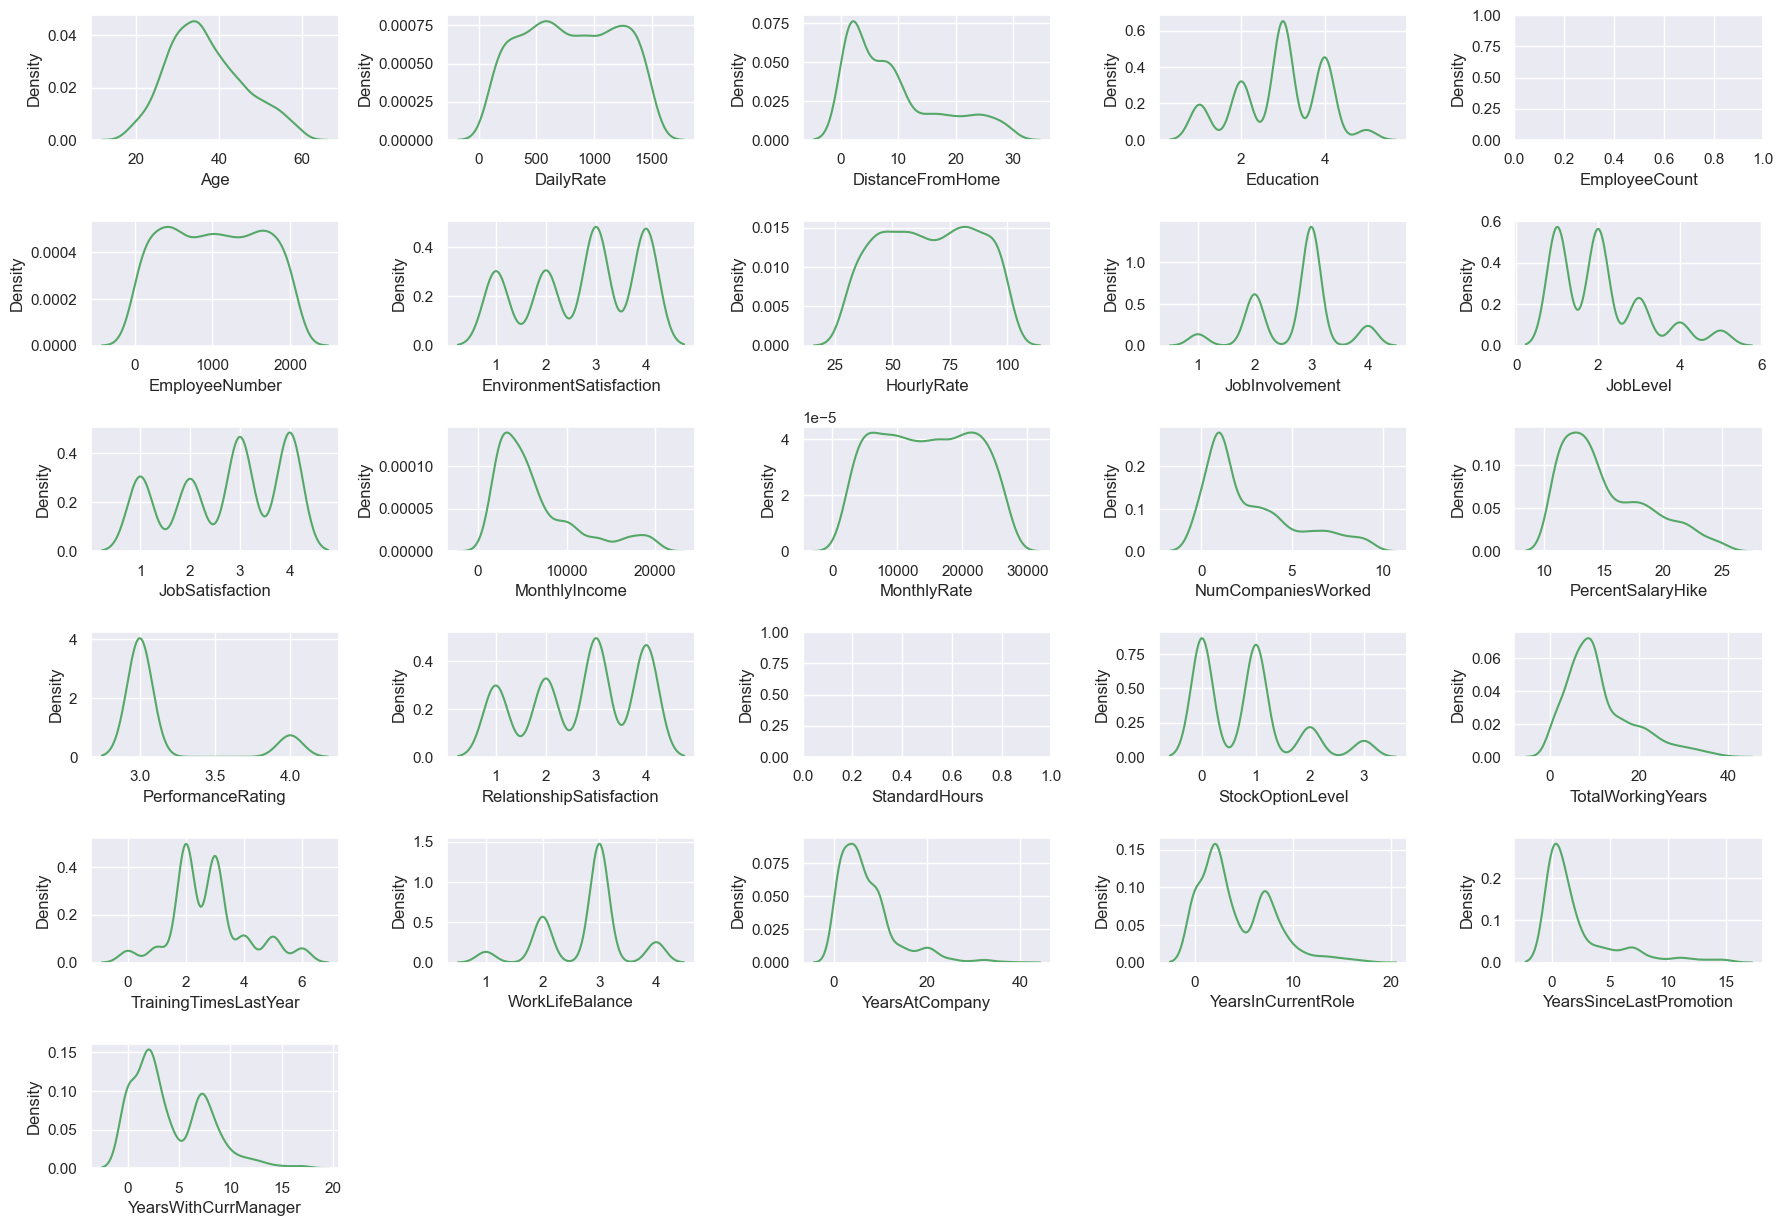

In [39]:
#displot
features = nums
plt.figure(figsize=(18,14))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(nums)/4), 5, i+1)
    sns.kdeplot(x=df[features[i]], color='g', warn_singular=False)
    plt.xlabel(features[i])
    plt.tight_layout()

In [40]:
'''#violin
features = nums
plt.figure(figsize=(12,14))
for i in range(0, len(features)):
    plt.subplot(math.ceil(len(nums)/4), 4, i+1)
    sns.violinplot(y=df[features[i]], color='g')
    plt.tight_layout()'''

"#violin\nfeatures = nums\nplt.figure(figsize=(12,14))\nfor i in range(0, len(features)):\n    plt.subplot(math.ceil(len(nums)/4), 4, i+1)\n    sns.violinplot(y=df[features[i]], color='g')\n    plt.tight_layout()"

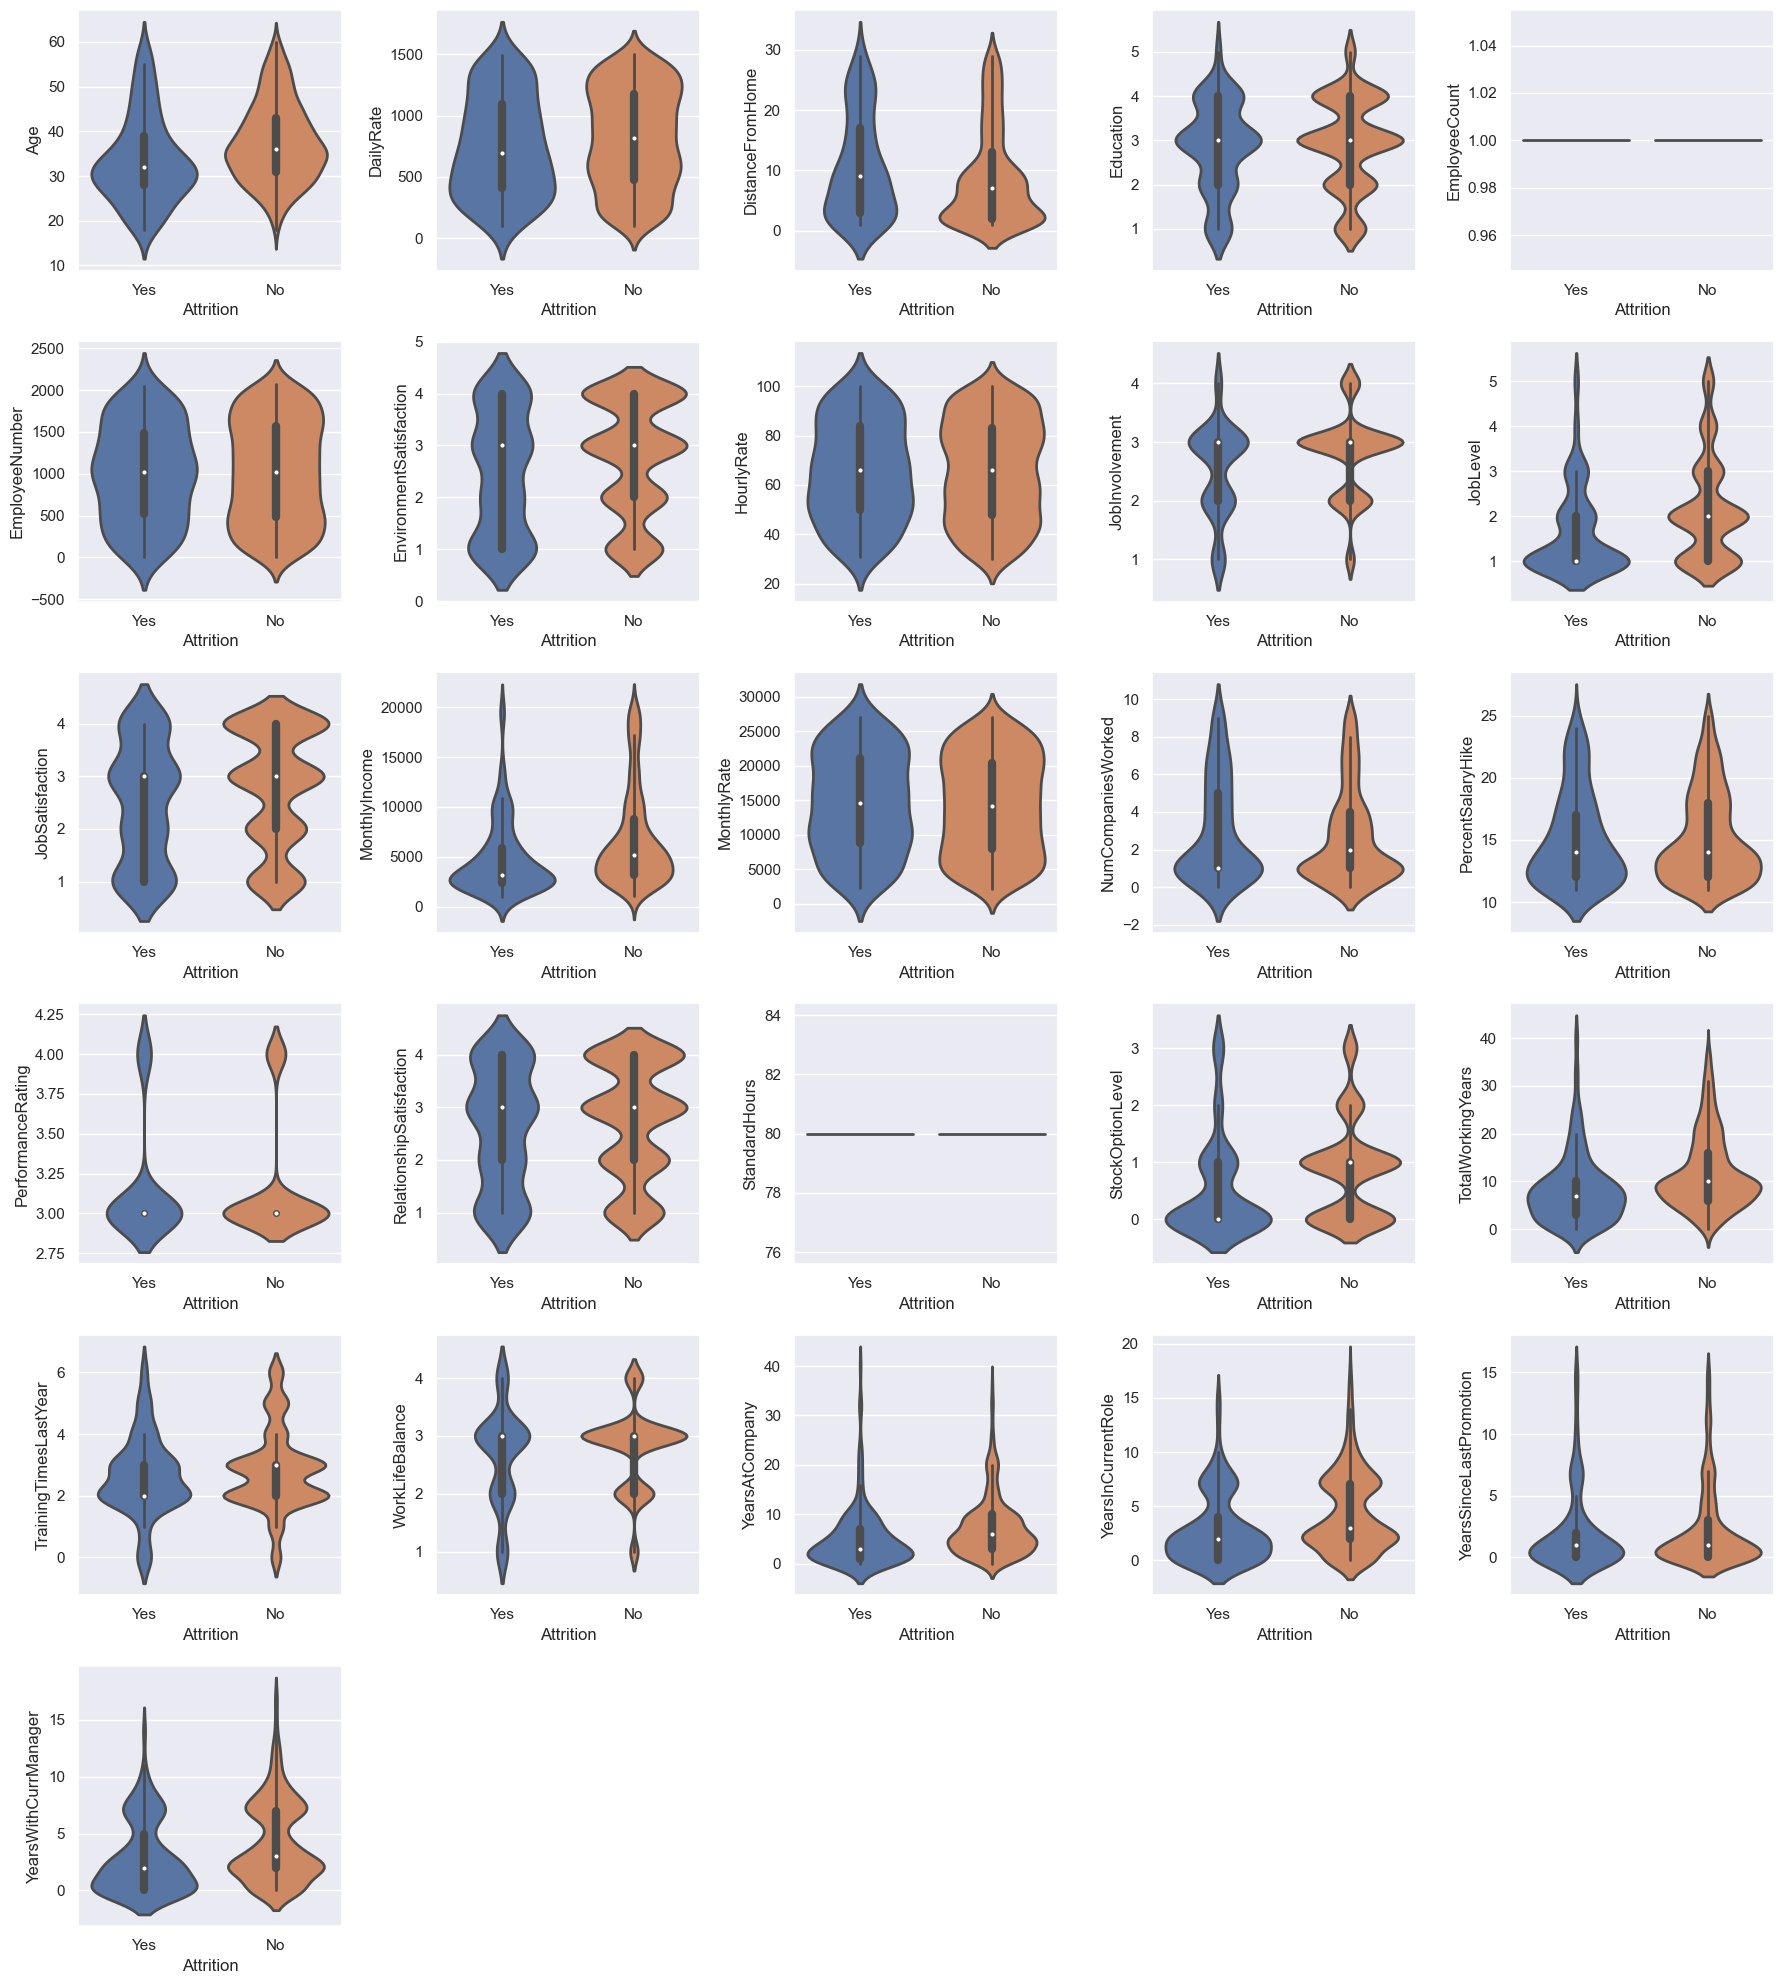

In [41]:
import math

plt.figure(figsize=(18, 20))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/5), 5, i+1)
    sns.violinplot(data=df, y=nums[i], x='Attrition', linewidth=2, orient='v')
    plt.tight_layout()

plt.show()
    

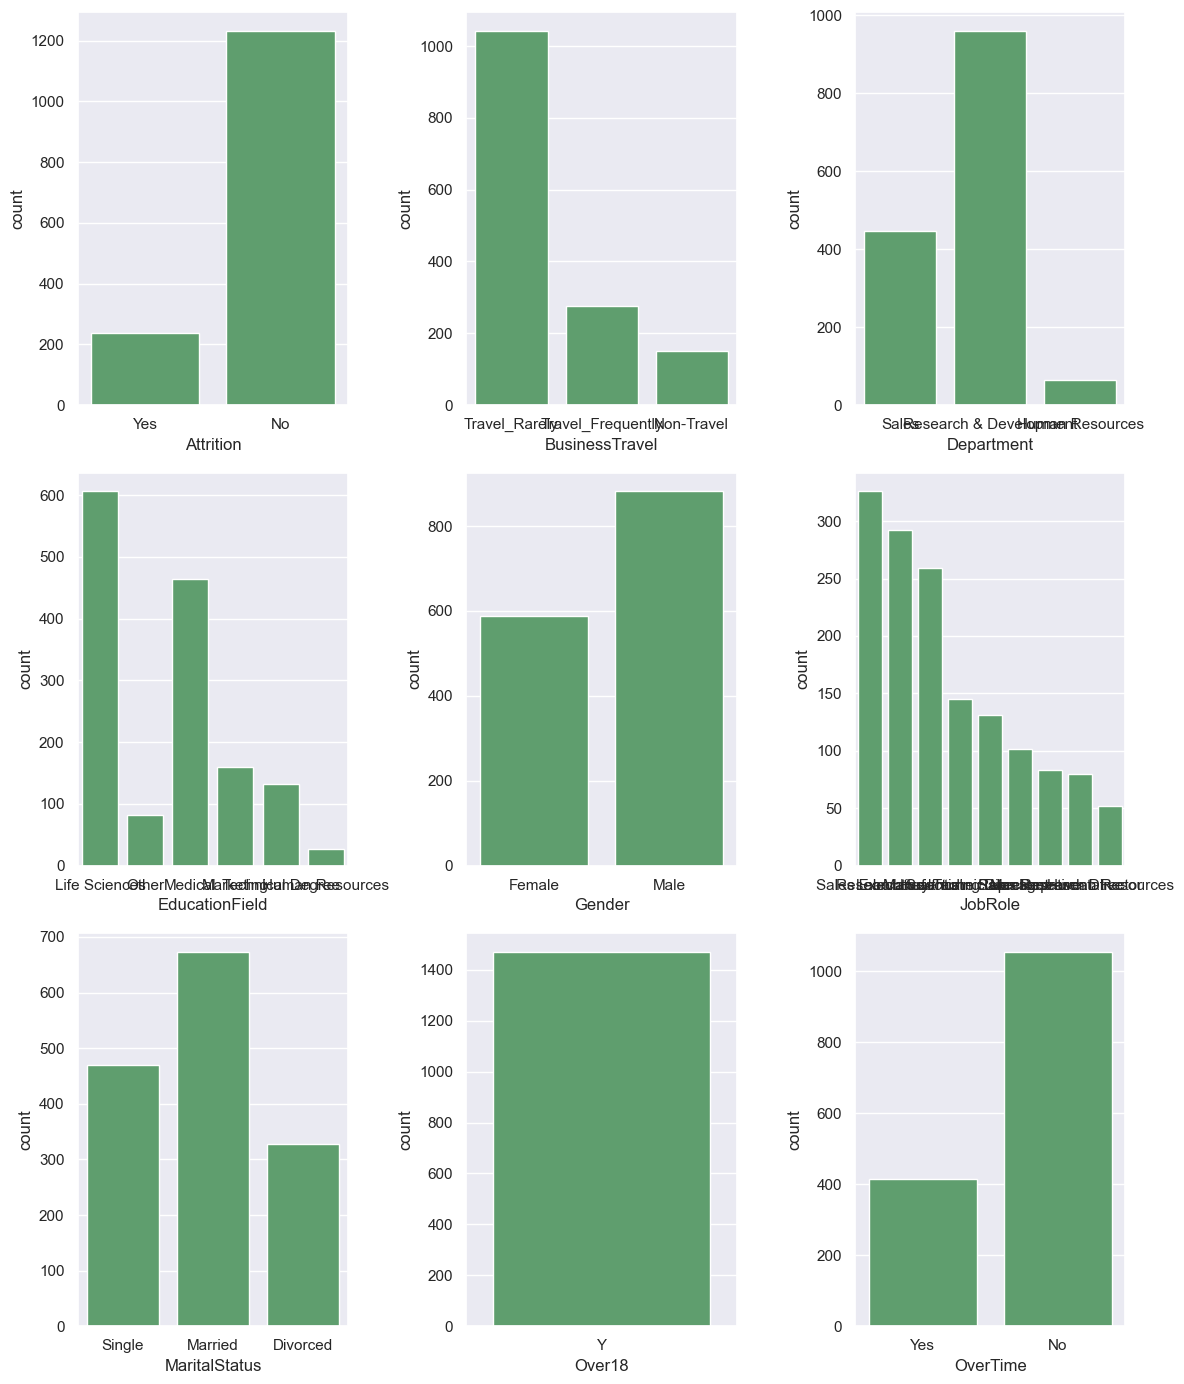

In [42]:
#countplot

features = cats

plt.figure(figsize=(12,14))  # Menambahkan pemanggilan fungsi figure()

for i in range(0, len(features)):
    plt.subplot(math.ceil(len(cats)/3), 3, i+1)
    sns.countplot(x=df[features[i]], color='g')
    plt.tight_layout()

plt.show()


Agar lebih jelasnya, lebih baik dilihat dari nilai tertingginya menggunakan `value_counts()`, dan akan ditampilkan presentasenya

In [43]:
for cat in cats:
    print('Category: ', cat)
    print((df[cat].value_counts() / len(df) * 100).head(10).map('{:.2f}%'.format))
    print()


Category:  Attrition
No     83.88%
Yes    16.12%
Name: Attrition, dtype: object

Category:  BusinessTravel
Travel_Rarely        70.95%
Travel_Frequently    18.84%
Non-Travel           10.20%
Name: BusinessTravel, dtype: object

Category:  Department
Research & Development    65.37%
Sales                     30.34%
Human Resources            4.29%
Name: Department, dtype: object

Category:  EducationField
Life Sciences       41.22%
Medical             31.56%
Marketing           10.82%
Technical Degree     8.98%
Other                5.58%
Human Resources      1.84%
Name: EducationField, dtype: object

Category:  Gender
Male      60.00%
Female    40.00%
Name: Gender, dtype: object

Category:  JobRole
Sales Executive              22.18%
Research Scientist           19.86%
Laboratory Technician        17.62%
Manufacturing Director        9.86%
Healthcare Representative     8.91%
Manager                       6.94%
Sales Representative          5.65%
Research Director             5.44%
Human

Observasi :

- Terdapat beberapa yang mengalami positifly skewed seperti `MonthlyIncome` `NumCompaniesWorked` `PercentSalaryHike` `TotalWorkingYears` `YearsAtCompany` `YearsInCurrentRole` `YearsSinceLastPromotion` `YearsWithCurrManager` <br>
- Dilihat dari violin plot, penyebaran datanya sudah lumayan merata kecuali pada kolom yang telah disebutkan
- Terdapat nilai outliers pada beberapa kolom

# Multivariate

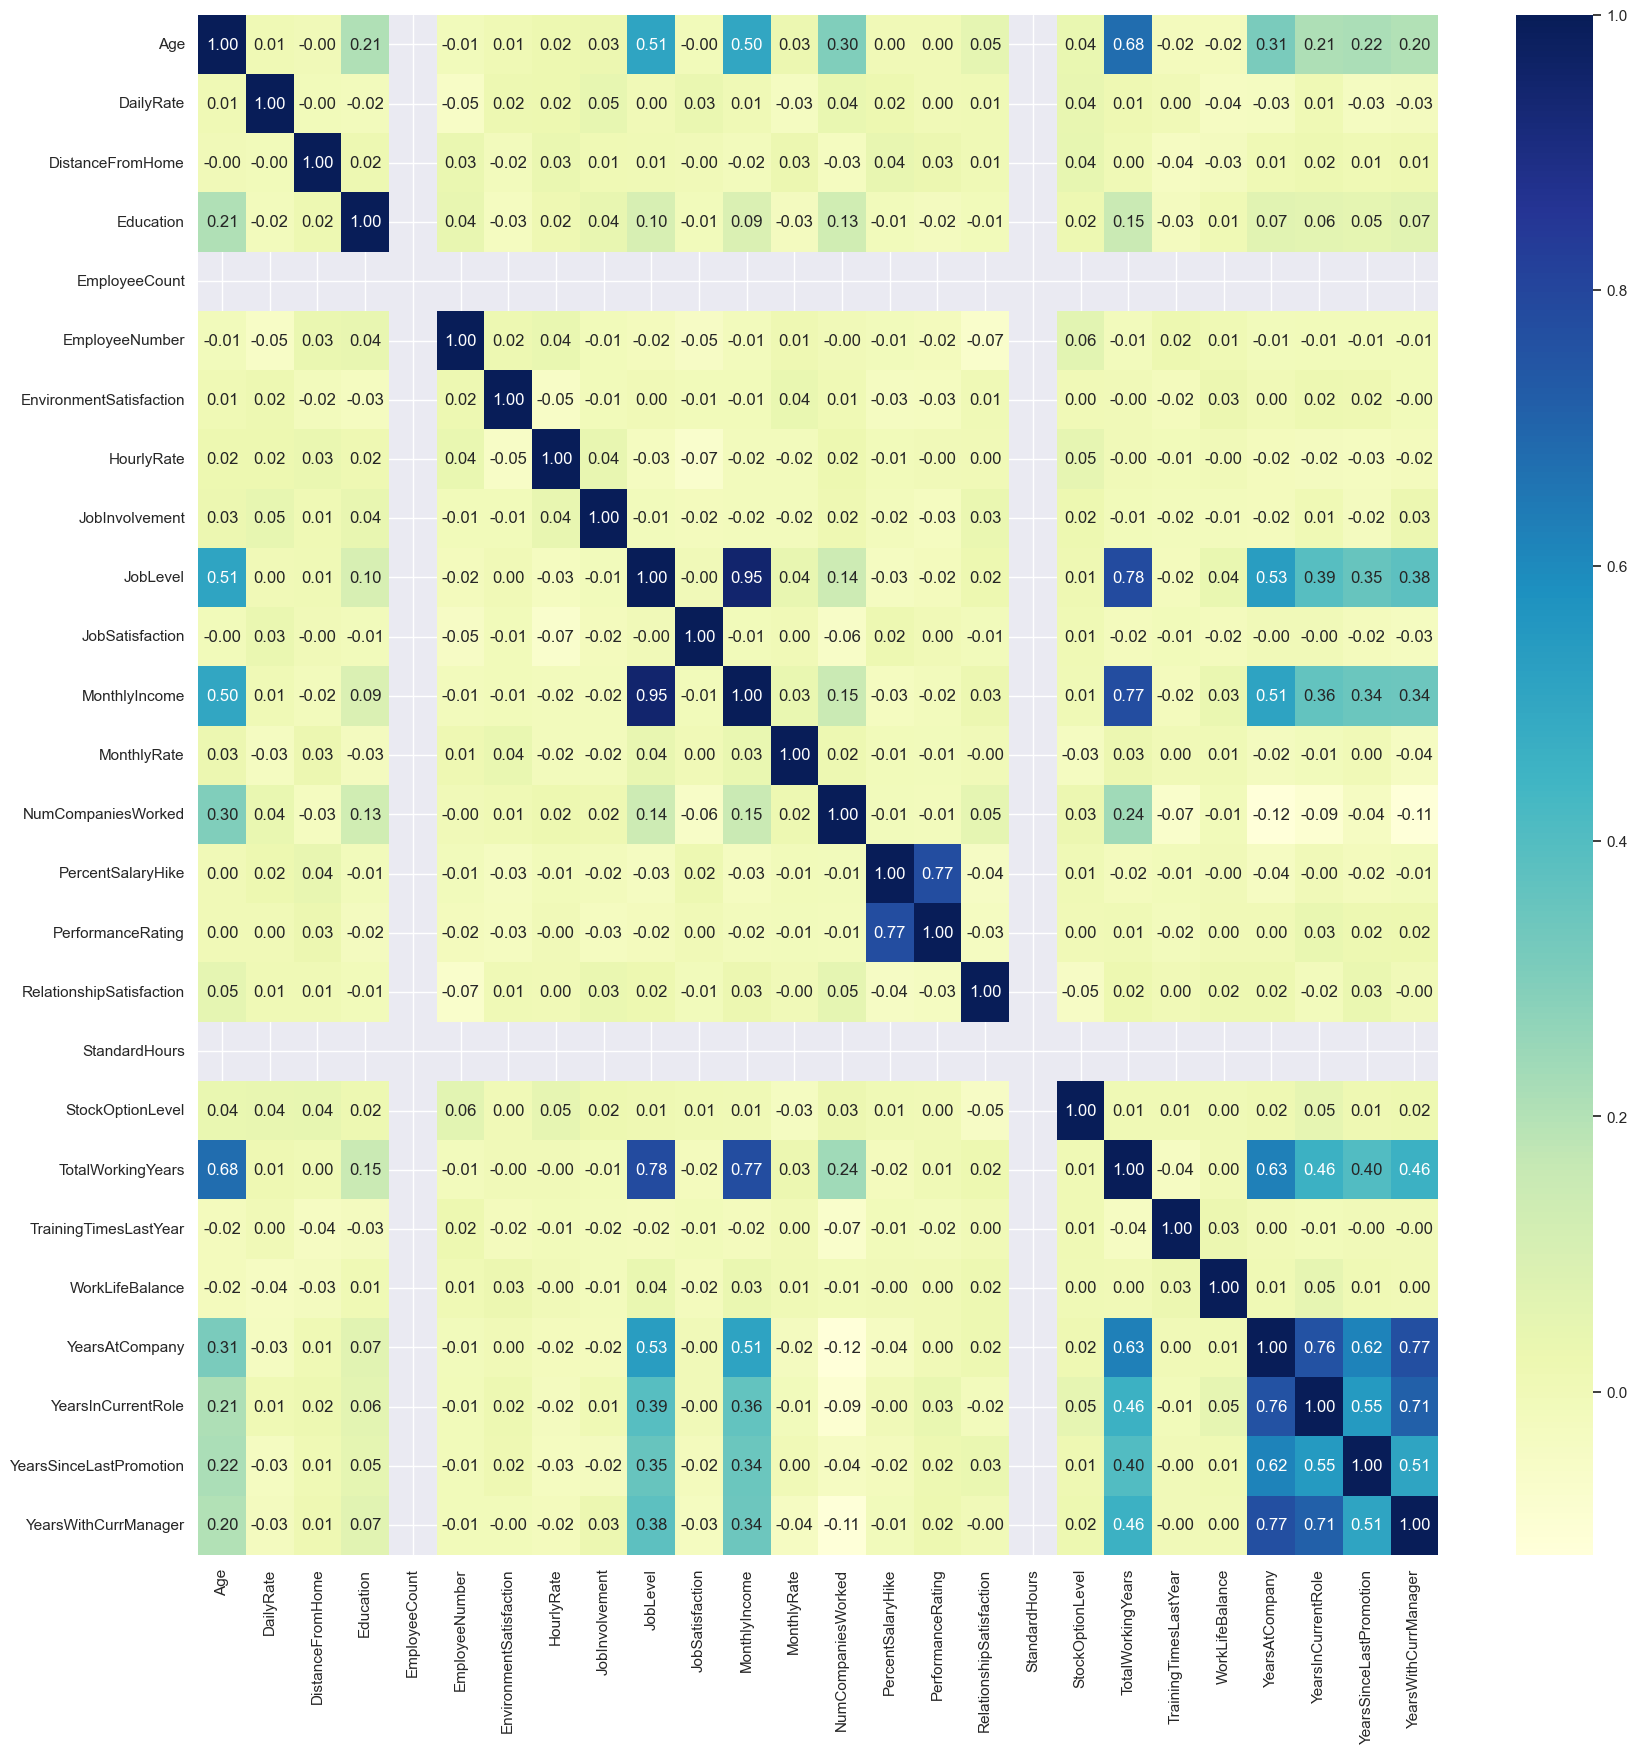

In [44]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

In [45]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1, inplace=True)

In [46]:
numerical = df[['Age', 'DailyRate','DistanceFromHome', 'HourlyRate','MonthlyIncome','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears', 
 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

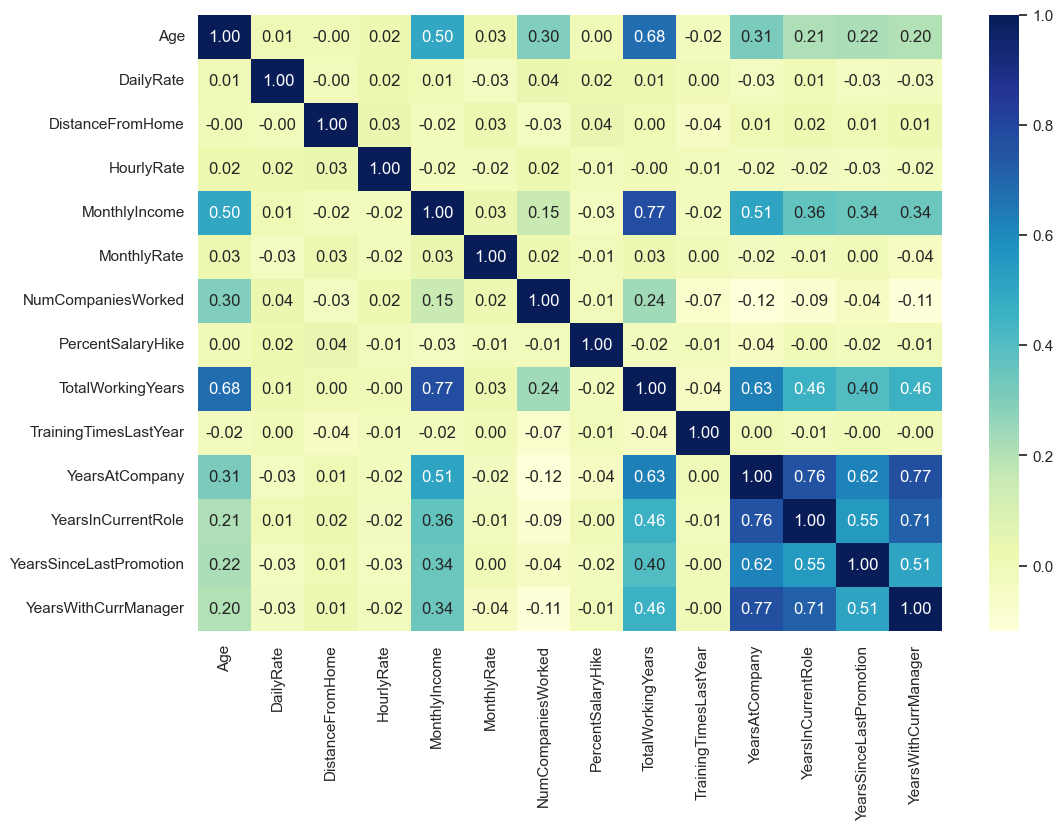

In [47]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numerical.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

Observasi:

Berikut beberapa insight yang dapat kita tarik dari univariate dan multivariate analysis di atas.

#### Univariate:

- Terdapat beberapa kolom yang memiliki outlier (`MonthlyIncome` `NumCompaniesWorked` `PerformanceRating` `StockOptionLevel` `TotalWorkingYears` `WorkLifeBalance` `YearsAtCompany` `YearsInCurrentRole` `YearsSinceLastPromotion` `YearsWithCurrManager`) <br>
- Beberapa kolom mengalai positifly skewed
- Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome`
- Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `Over18`


#### Multivariate:
- Terdapat multicollinearity antara kolom `JobLevel` dan `MonthlyIncome`, berarti kita bisa membuang salah satunya
- Korelasi antar beberpaa features memiliki nilai korelasi yang cukup tinggi namun tidak cukup tinggi hingga bisa dihapus salah satunya
- Ada 2 features yang tidak menampilkan nilai karena hanya memiliki 1 niali unik
